In [1]:
import numpy as np        #importing libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
from google.colab import files    #uploading dataset from downloads
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [3]:
df = pd.read_csv("googleplaystore.csv")       #loading downloads

df.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
df.isnull().sum()         #checking null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
df = df.dropna()   #dropping null values
df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
def convert_size(size):   #datatype fixing and converting into float
    if 'M' in size:
        return float(size.replace('M','')) * 1000
    elif 'k' in size:
        return float(size.replace('k',''))
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)


In [7]:
df['Reviews'] = pd.to_numeric(df['Reviews'])   #converting 'reviews' from string to numeric


In [8]:
df['Installs'] = df['Installs'].str.replace('+','')  #cleaning
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].astype(int)


In [9]:
df['Price'] = df['Price'].str.replace('$','')  #price cleaning converting symbols to float
df['Price'] = df['Price'].astype(float)


In [10]:
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]   #making sure ratings are btw 1 and 5


In [11]:
df = df[df['Reviews'] <= df['Installs']]   #installs must always be greater than reviews


In [12]:
df = df[~((df['Type'] == 'Free') & (df['Price'] > 0))]  #free apps -> price=0


In [13]:
sns.boxplot(df['Price'])
plt.show()


In [14]:
sns.boxplot(df['Reviews'])
plt.show()


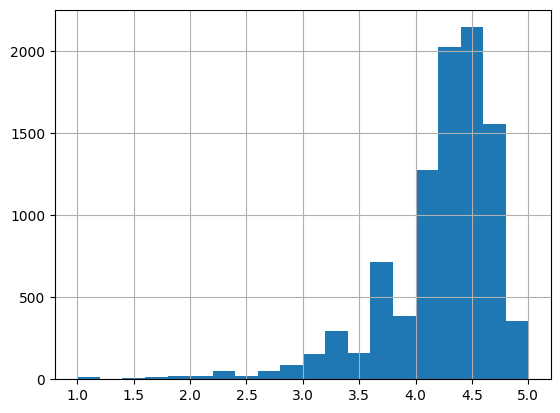

In [15]:
df['Rating'].hist(bins=20)
plt.show()


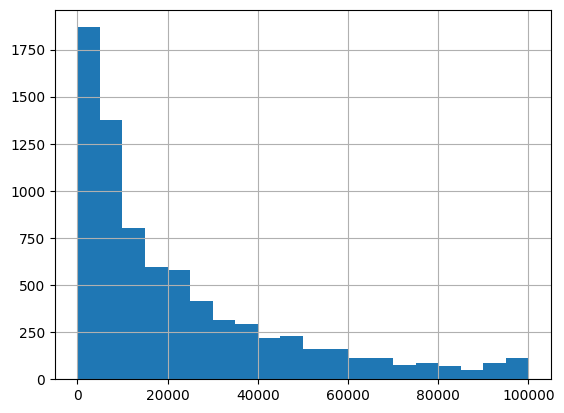

In [16]:
df['Size'].hist(bins=20)
plt.show()


In [17]:
df = df[df['Price'] <= 200]   #more than 200$ apps are removed


In [18]:
df = df[df['Reviews'] <= 2000000]  #star apps with more than 2m reviews are removed


In [19]:
threshold = df['Installs'].quantile(0.95)    #removes apps with top 5 extreme install values
df = df[df['Installs'] <= threshold]


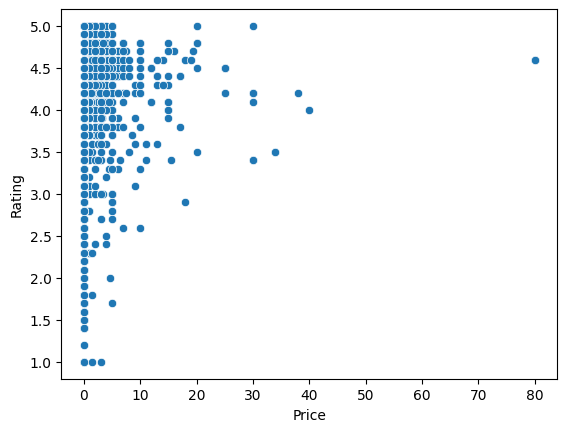

In [20]:
sns.scatterplot(x='Price', y='Rating', data=df)    #checks if expensive apps have better ratings.
plt.show()


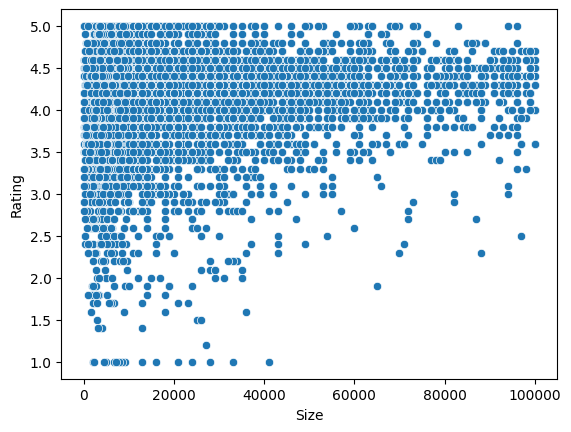

In [26]:
sns.scatterplot(x='Size', y='Rating', data=df)    #size vs rating scatter plot
plt.show()


In [27]:
sns.scatterplot(x='Reviews', y='Rating', data=df)     #along with reviews and rating
plt.show()


In [28]:
sns.boxplot(x='Content Rating', y='Rating', data=df)   #if rating is based on the content
plt.xticks(rotation=45)
plt.show()


In [29]:
plt.figure(figsize=(15,5))            #category wise rating
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.show()


In [30]:
inp1 = df.copy()

inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

inp1 = inp1.drop(['App','Last Updated','Current Ver','Android Ver'], axis=1)    #dropping more unecessary columns

inp2 = pd.get_dummies(             # Converting categorical columns including Type
    inp1,
    columns=['Category','Genres','Content Rating','Type'],
    drop_first=True
)

inp2 = inp2.dropna()        #dropping more null values and checkinh for remaining NaN values

print("Remaining NaN values:", inp2.isnull().sum().sum())



Remaining NaN values: 0


In [31]:
X = inp2.drop('Rating', axis=1)
y = inp2['Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [32]:
model = LinearRegression()      #using linear regression model
model.fit(X_train, y_train)


LinearRegression()

In [33]:
train_pred = model.predict(X_train)
print("Train R2:", r2_score(y_train, train_pred))    #reprting r2 on training set


Train R2: 0.16036440979501387


In [34]:
test_pred = model.predict(X_test)                       #reprting r2 on testing set
print("Test R2:", r2_score(y_test, test_pred))


Test R2: 0.11349269131988093
